# Gas

* Gas Reserves - TN CM 
* Gas Production - BN CM
* Gas Consumption - BN CM
* Gas Prices - USD/MN BTU
* Gas Import Exports - BN CM
* LNG Exports - BN CM
* LNG Imports - BN CM
* Pipeline Trade Movements - BN CM

In [153]:
import pandas as pd
import pickle


colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow']

region_to_countries = {

    'NA':
                                 ['USA', 'Canada', 'Mexico', 'US'],
    'SA': 
                                ['Argentina', 'Brazil', 'Bolivia' ,'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago', 'Venezuela', 'Central America', 'Other Caribbean', 'Other South America', 'Other S. & Cent. America', 
                                 'S. & Cent. America', 'Curacao', 'Netherlands Antilles', 'Other Americas'],

    'EU':                   [
                                'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
                                'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
                                'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                                'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
                                'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Other Europe',
                                'United Kingdom', 'Europe', 'European Union', 'Rest of Europe', 'Other EU' 
                                ],
    'CIS': 
                                ['Azerbaijan','Belarus', 'Kazakhstan','Russian Federation', 'Turkmenistan', 'USSR','Uzbekistan', 'Other CIS', 'CIS', 'Russia'],
    'APAC': 
                                ['China', 'Japan', 'India', 'Australia', 'Brunei','China','Indonesia','Malaysia','Thailand','Vietnam','Other Asia Pacific', 'Bangladesh','China Hong Kong SAR',
                                 'New Zealand', 'Philippines', 'Pakistan', 'South Korea', 'Sri Lanka', 'Taiwan', 'Myanmar','Papua New Guinea','Brunei', 'Singapore','Other Asia', 'OECD Asia'],
    'AF': 
                                ['Algeria', 'Egypt','Morocco', 'South Africa','Eastern Africa', 'Middle Africa', 'Western Africa', 'Other Northern Africa', 'Other Southern Africa', 
                                 'Angola', 'Chad', 'Republic of Congo','Egypt', 'Equatorial Guinea','Gabon', 'Libya','Nigeria','South Sudan','Sudan','Tunisia','Other Africa', 'Africa'],
    'ME': 
                                ['Iran', 'Iraq','Israel', 'Kuwait','Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates','Other Middle East', 'Bahrain', 'Yemen', 'Syria', 'Other Middle East & Africa', 'Middle East']
}


def map_region_index(country):
    for region, countries in region_to_countries.items():
        if country in countries:
            return region
    return 'Unknown'

def map_region_column(country):
    for region, countries in region_to_countries.items():
        if country in countries:
            return (region, country)
    return (None, country) 


oil_tabs = ["Energy Cons", "Energy Cons Fuel 2022", "Oil Reserves", "Oil Production", "Liquids Consumption", "Product Regional Consumption", 
                    "Spot Crude Prices", "Capacity", "Throughput", "Margins", "Crude Import Export", "Crude Movement 2022", "Product Movement 2022"]

gas_tabs = ["Gas Reserves", "Gas Production", "Gas Consumption", "Gas Prices", "Gas Imports Exports", "LNG Exports", "LNG Imports","LNG Trade Movements" ,"Pipeline Trade Movements"]

oil_path = 'BP-Statistical-Review-2022-Crude.xlsx'
gas_path = 'BP-Statistical-Review-2022-Gas.xlsx'

def create_dfs(fp, tabs, load_pickle=False):

    if 'Crude'in fp:
        name = 'crude'
    if 'Gas' in fp:
        name = 'gas'

    if load_pickle:
        with open(f'{name}.pkl', 'rb') as handle:
            dfs = pickle.load(handle)
    else:
        xls = pd.ExcelFile(fp)
        dfs = {}
        for sheet_name in xls.sheet_names:
            df = xls.parse(sheet_name, header=0)
            if df.columns[0] == 'Country':        
                df['Continent'] = df['Country'].apply(map_region_index)
                # if 'Movement' in sheet_name:
                #     df.columns = df.columns.map(map_region_column)
                if 'Product' in df.columns:
                    df.set_index(['Continent', 'Country', 'Product'], inplace=True)
                elif 'Type' in df.columns:
                    df.set_index(['Continent', 'Country', 'Type'], inplace=True)
                else:
                    df.set_index(['Continent', 'Country'], inplace=True)
            elif 'Region' in df.columns:
                if 'Type' in df.columns:
                    df.set_index(['Region','Type'], inplace=True)
                else:
                    df.set_index(['Region'], inplace=True)
            elif df.columns[0] == 'Year':
                df.set_index(['Year'], inplace=True)
                
    
            if 'Thousand barrels daily' in df.columns:
                df.drop(columns=['Thousand barrels daily'],inplace=True)
            dfs[sheet_name] = df

        with open(f'{name}.pkl', 'wb') as handle:
            pickle.dump(dfs, handle)

    for tab in tabs:
        var_name = tab.lower().replace(' ', '_')
        globals()[var_name] = dfs[tab]

    return 0



create_dfs(oil_path, oil_tabs, load_pickle=True)
create_dfs(gas_path, gas_tabs, load_pickle=False)


lng_trade_movements.columns = lng_trade_movements.columns.map(map_region_column)
pipeline_trade_movements.columns = pipeline_trade_movements.columns.map(map_region_column)

lng_trade_movements = lng_trade_movements.replace(0, np.NaN)
pipeline_trade_movements = pipeline_trade_movements.replace(0, np.NaN)


# Gas Reserves

<AxesSubplot: title={'center': 'Gas reserves 1980-2022, TN CMs'}, ylabel='Continent'>

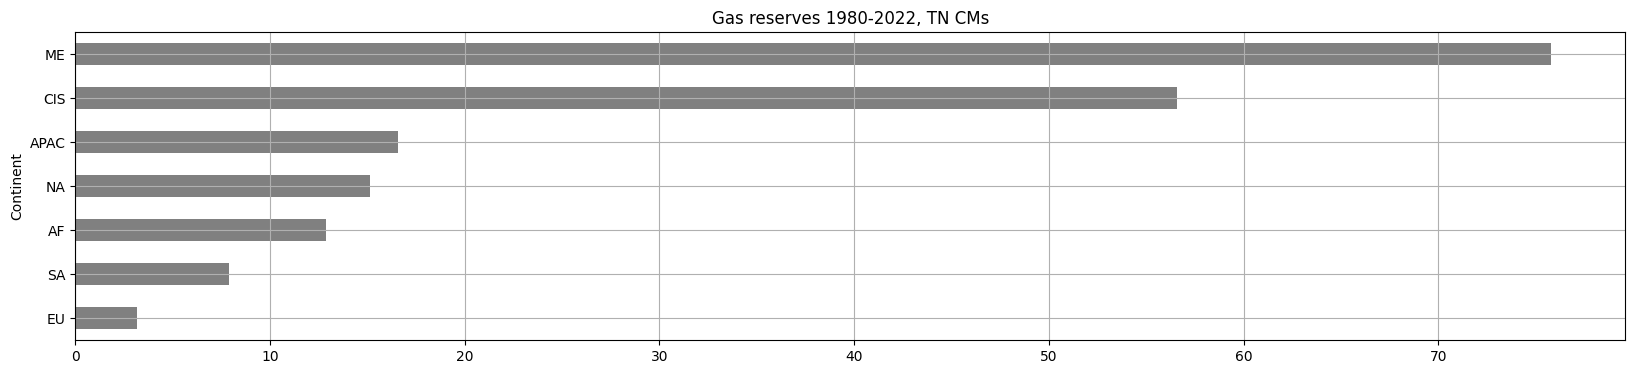

In [154]:
gas_reserves.T.groupby(level=0,axis=1).sum().iloc[-1].sort_values().plot(kind='barh', color='grey',figsize=(20,4),grid=True, title='Gas reserves 1980-2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Continent,Country'>

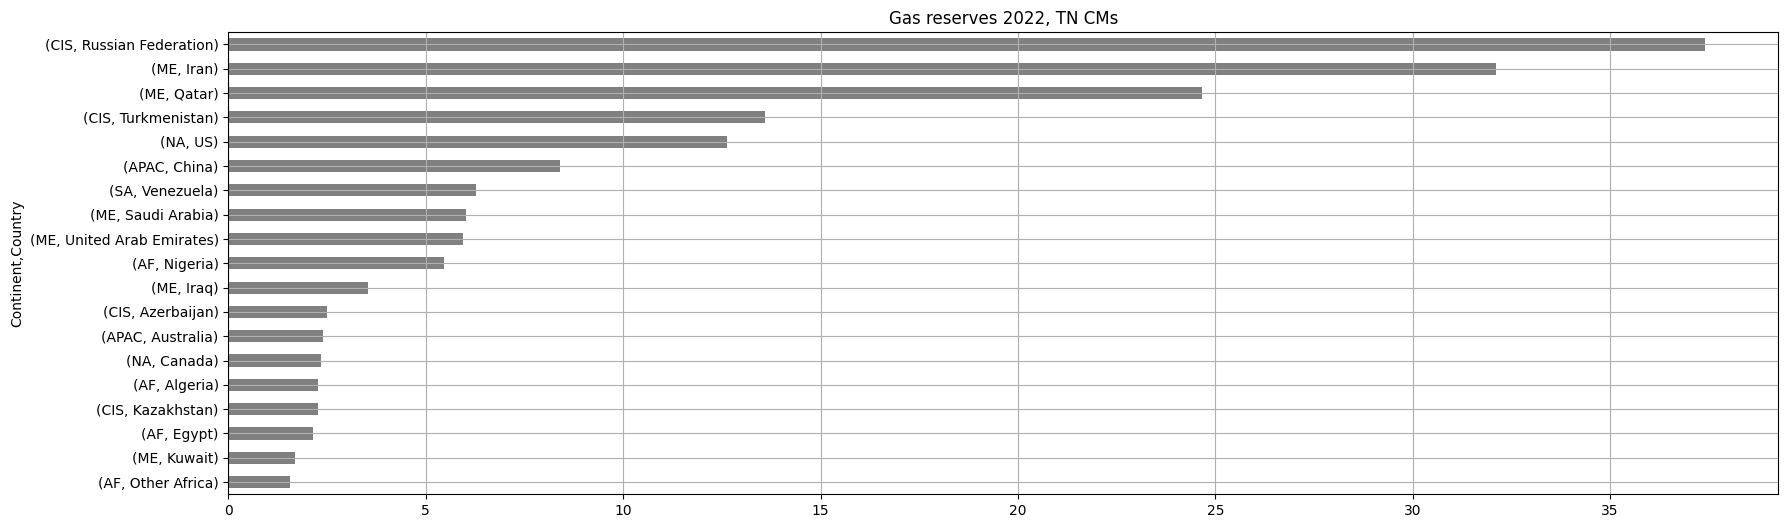

In [155]:
gas_reserves.T.iloc[-1].sort_values().iloc[-20:].dropna().plot(figsize=(20,6),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Continent'>

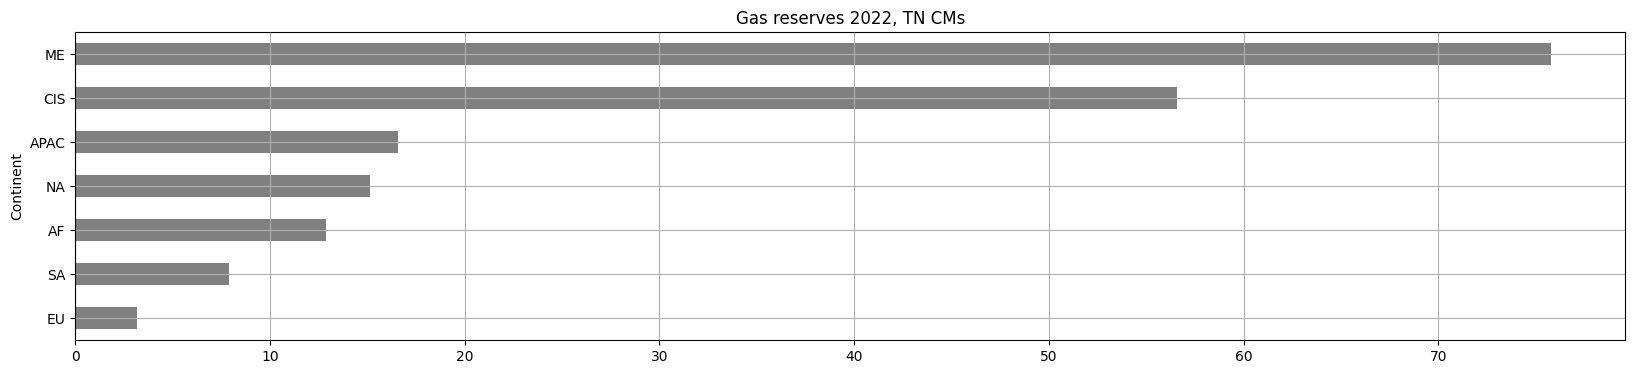

In [156]:
gas_reserves.T.groupby(level=0,axis=1).sum().iloc[-1].sort_values().plot(figsize=(20,4),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Country'>

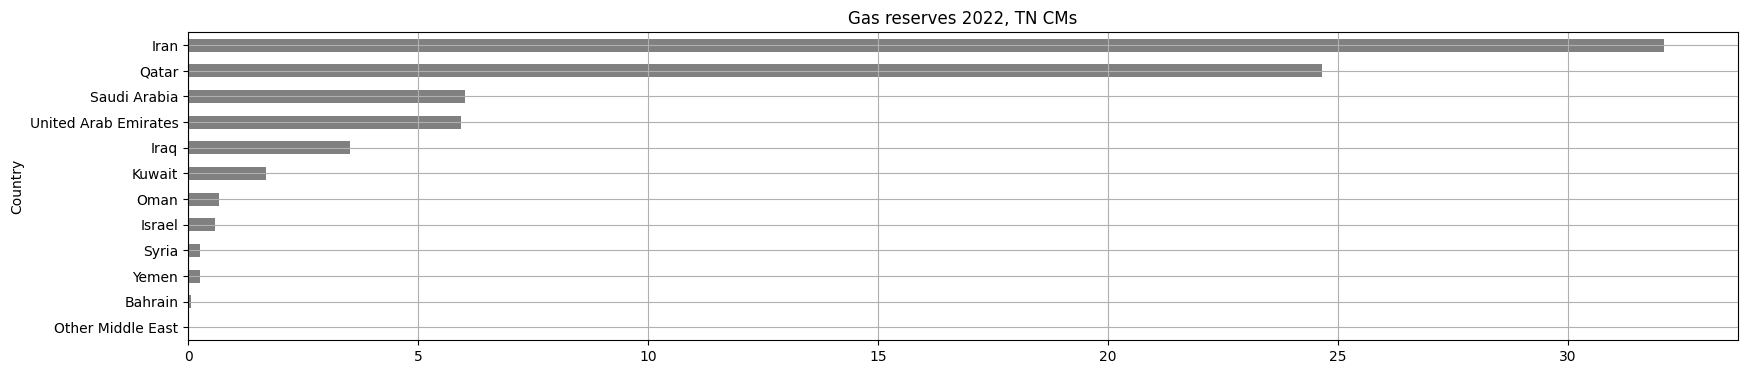

In [157]:
gas_reserves.T['ME'].iloc[-1].sort_values().plot(figsize=(20,4),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Country'>

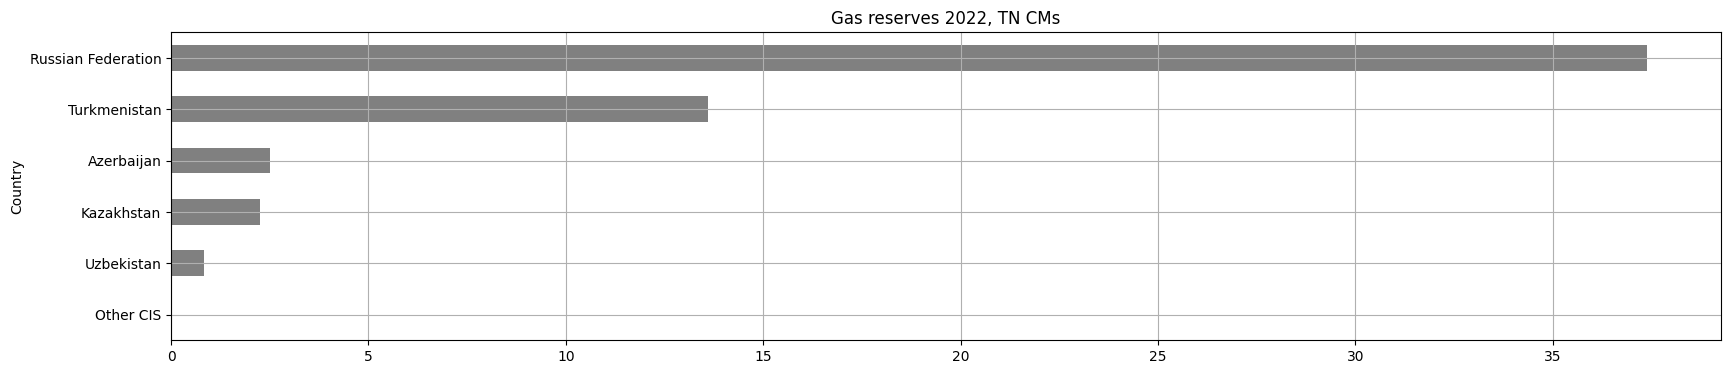

In [158]:
gas_reserves.T['CIS'].iloc[-1].sort_values().dropna().plot(figsize=(20,4),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Country'>

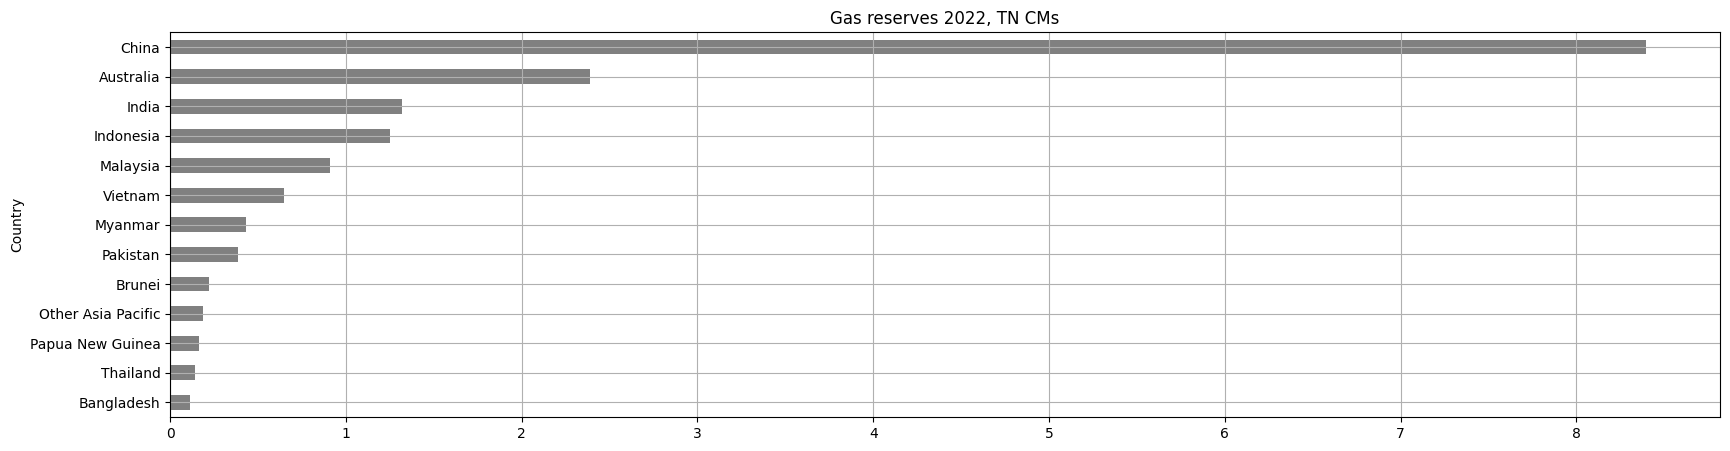

In [159]:
gas_reserves.T['APAC'].iloc[-1].sort_values().dropna().plot(figsize=(20,5),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Country'>

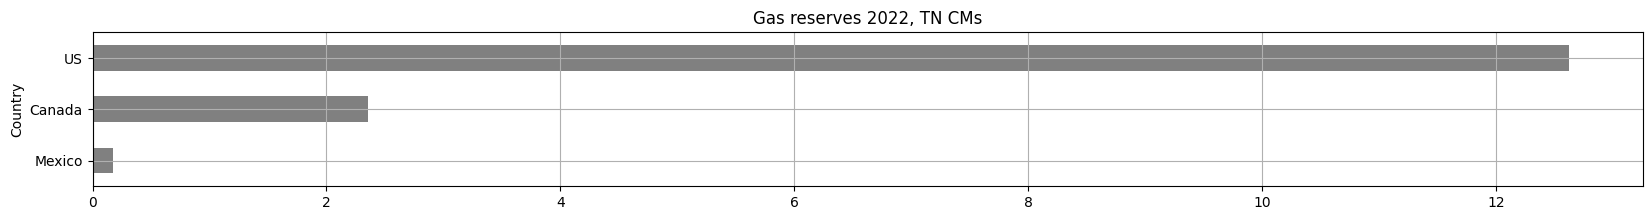

In [160]:
gas_reserves.T['NA'].iloc[-1].sort_values().dropna().plot(figsize=(20,2),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

<AxesSubplot: title={'center': 'Gas reserves 2022, TN CMs'}, ylabel='Country'>

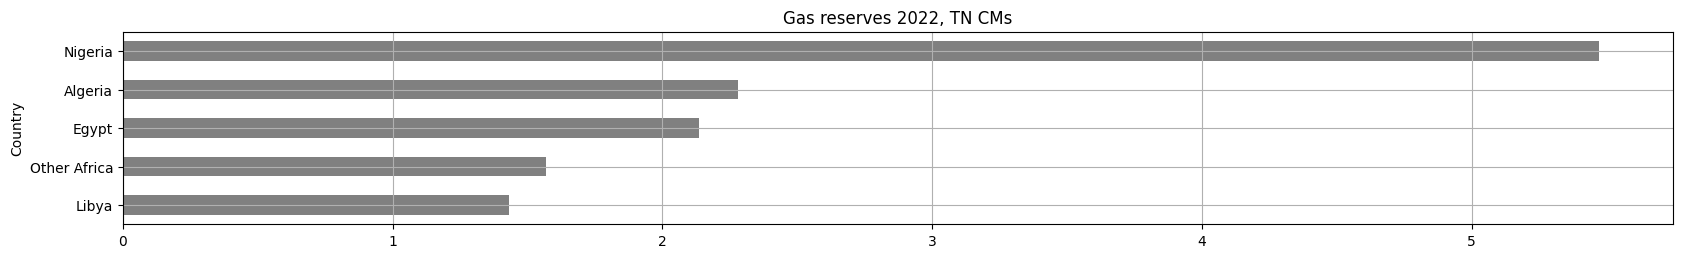

In [161]:
gas_reserves.T['AF'].iloc[-1].sort_values().dropna().plot(figsize=(20,2.5),grid=True, kind='barh', color='grey', title='Gas reserves 2022, TN CMs')

# Gas Production

<AxesSubplot: title={'center': 'Production from 1970-2022, by continent, BN CM / Y'}>

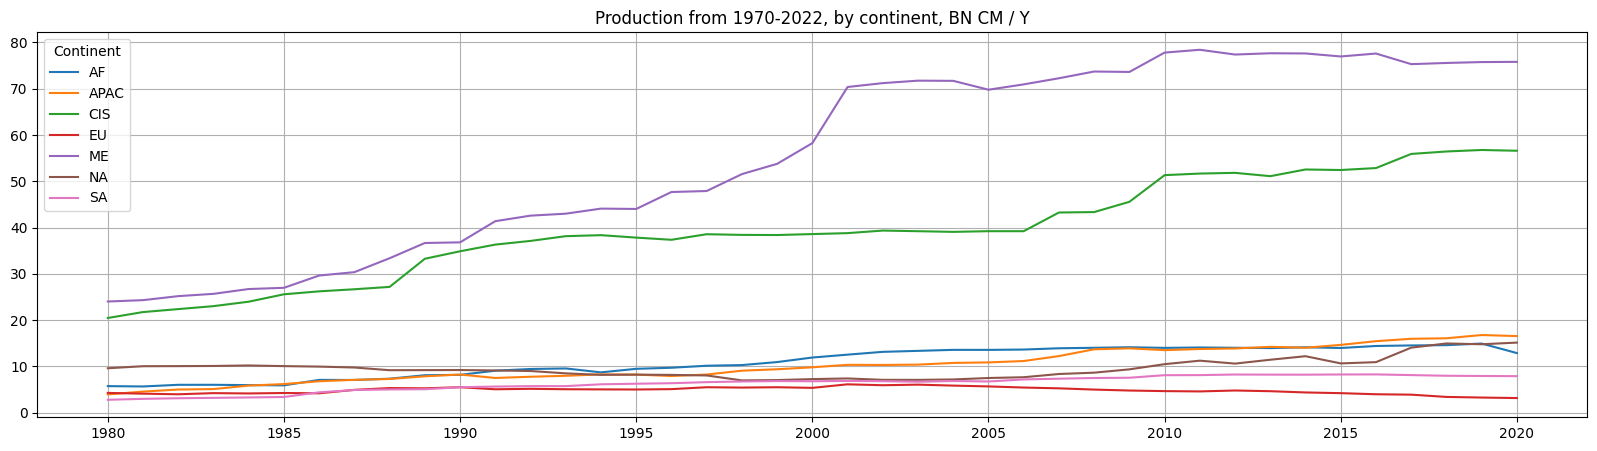

In [162]:
gas_reserves.T.groupby(level=0,axis=1).sum().plot(figsize=(20,5),grid=True, title='Production from 1970-2022, by continent, BN CM / Y')

<AxesSubplot: title={'center': 'Production from 1970-2022, by continent, BN CM / Y'}>

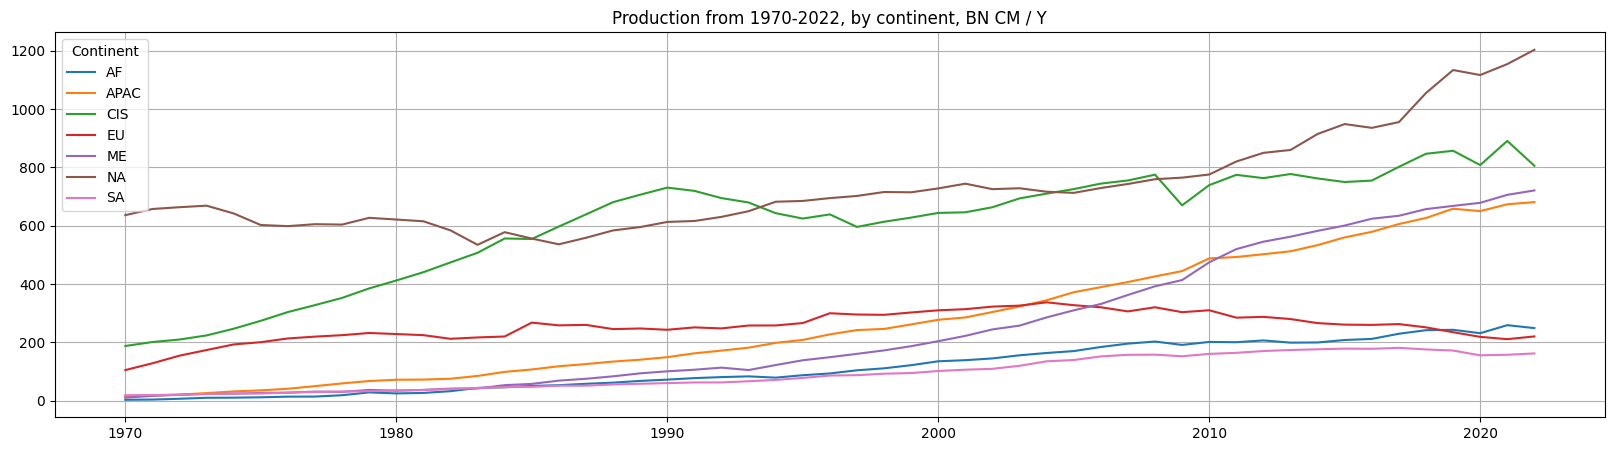

In [163]:
gas_production.T.groupby(level=0,axis=1).sum().plot(figsize=(20,5),grid=True, title='Production from 1970-2022, by continent, BN CM / Y')

<AxesSubplot: title={'center': 'Gas production 2022, BN CM / Y'}, ylabel='Continent'>

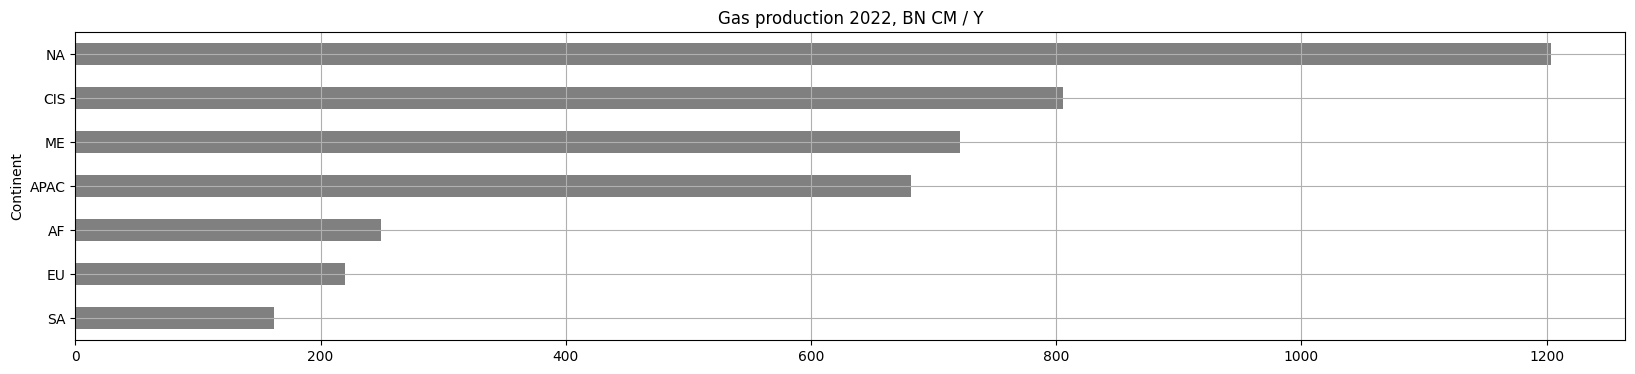

In [164]:
gas_production.T.groupby(level=0,axis=1).sum().iloc[-1].sort_values().plot(kind='barh', color='grey',figsize=(20,4),grid=True, title='Gas production 2022, BN CM / Y')

<AxesSubplot: title={'center': 'Production 2022, top countries, BN CM / Y'}, ylabel='Continent,Country'>

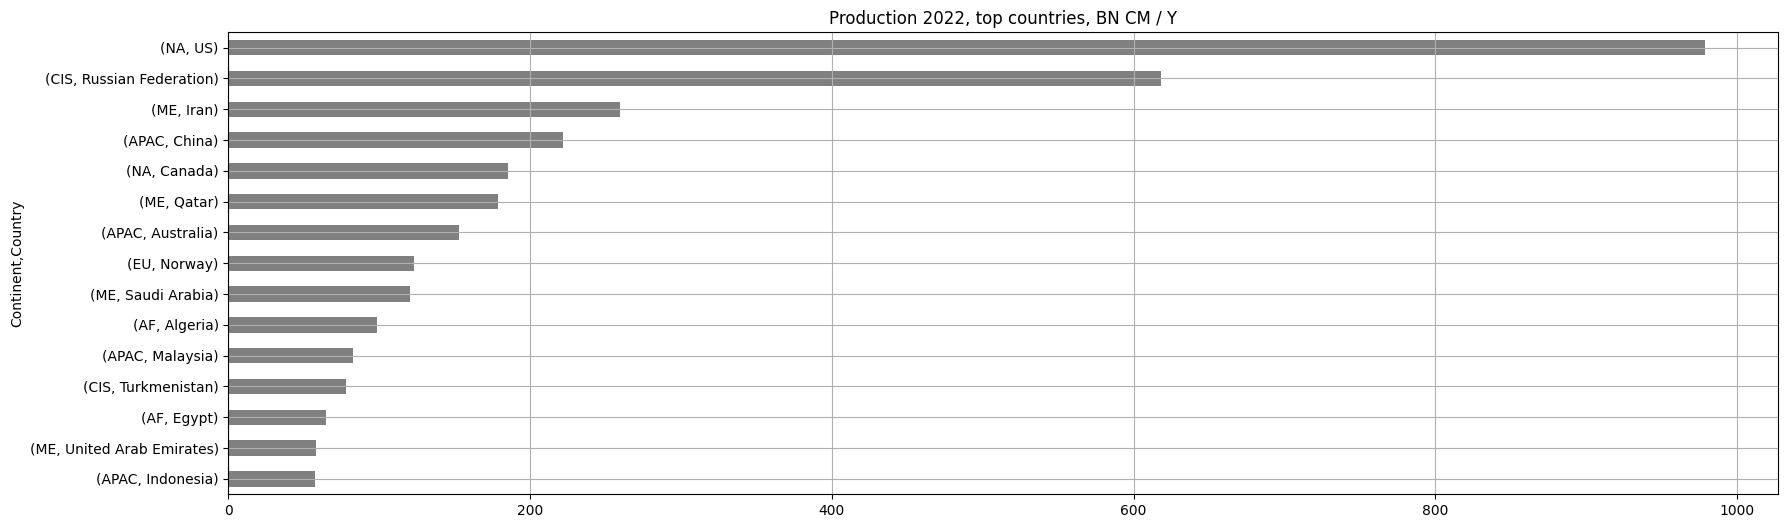

In [165]:
gas_production.T.iloc[-1].sort_values()[-15:].plot(kind='barh',figsize=(20,6),grid=True, rot=0,color='grey', title='Production 2022, top countries, BN CM / Y')

<AxesSubplot: title={'center': 'Production 2022, North America, BN CM / Y'}, ylabel='Country'>

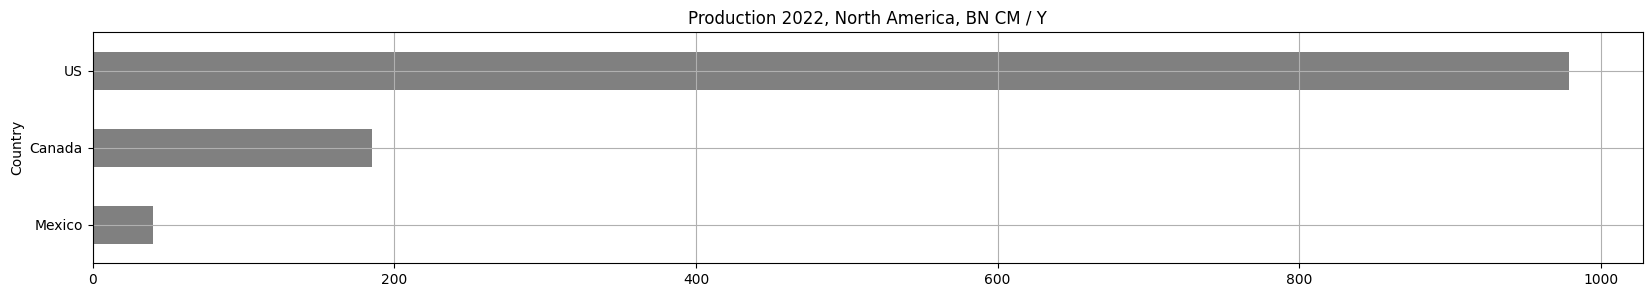

In [166]:
gas_production.T['NA'].iloc[-1].sort_values()[-15:].plot(kind='barh',figsize=(20,3),grid=True, rot=0,color='grey', title='Production 2022, North America, BN CM / Y')

<AxesSubplot: title={'center': 'Production 2022, CIS, BN CM / Y'}, ylabel='Country'>

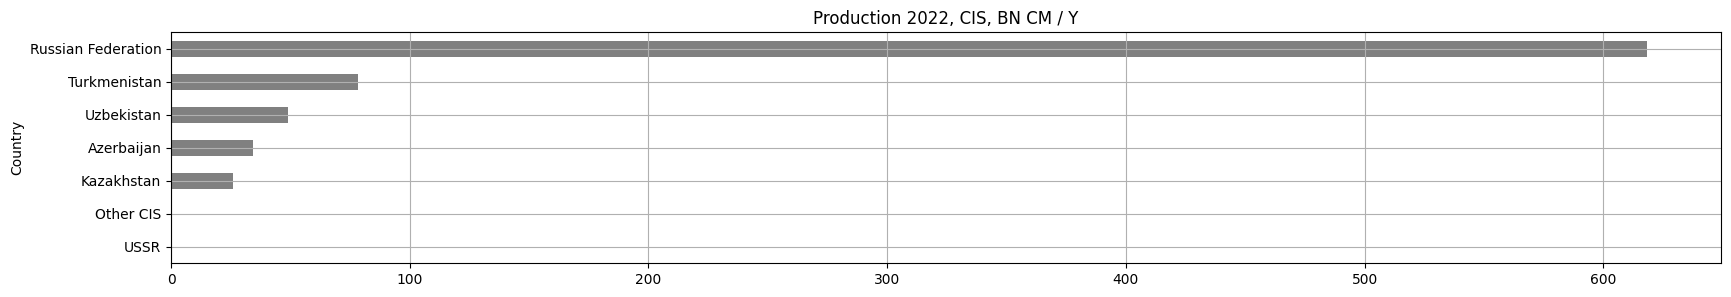

In [167]:
gas_production.T['CIS'].iloc[-1].sort_values().dropna().plot(kind='barh',figsize=(20,3),grid=True, rot=0,color='grey', title='Production 2022, CIS, BN CM / Y')

<AxesSubplot: title={'center': 'Production 2022, Middle East, BN CM / Y'}, ylabel='Country'>

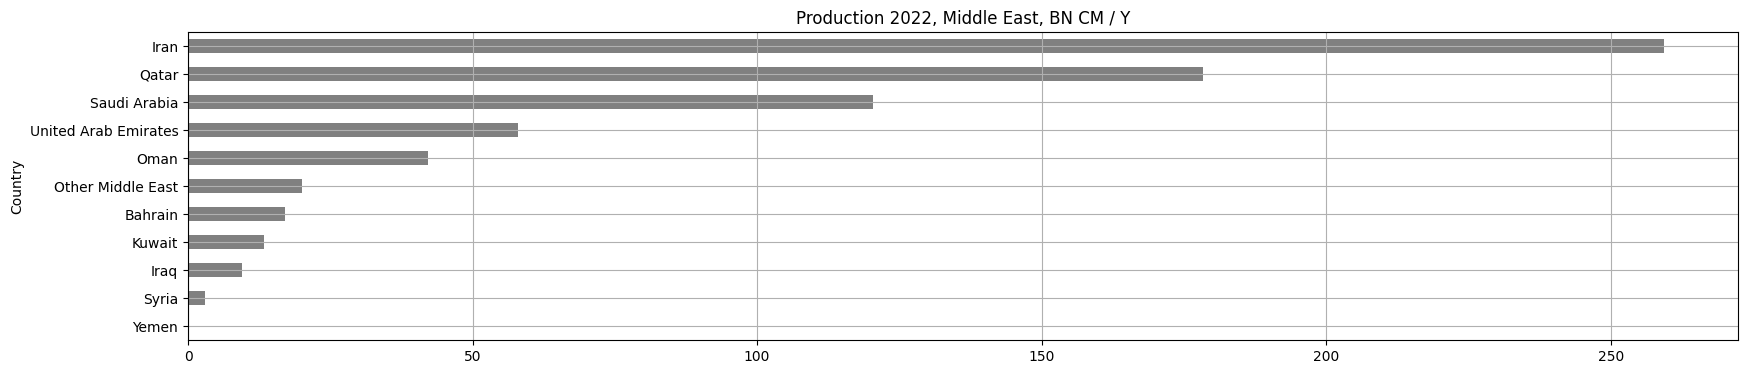

In [168]:
gas_production.T['ME'].iloc[-1].sort_values().dropna().plot(kind='barh',figsize=(20,4),grid=True, rot=0,color='grey', title='Production 2022, Middle East, BN CM / Y')

<AxesSubplot: title={'center': 'Production 2022, Asia Pacific, BN CM / Y'}, ylabel='Country'>

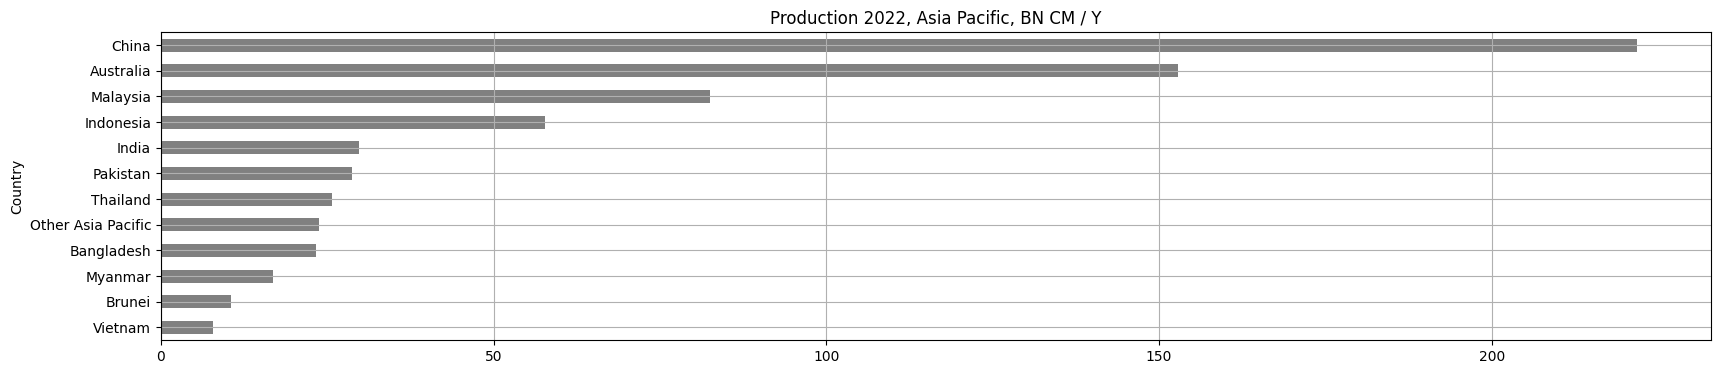

In [169]:
gas_production.T['APAC'].iloc[-1].sort_values().dropna().plot(kind='barh',figsize=(20,4),grid=True, rot=0,color='grey', title='Production 2022, Asia Pacific, BN CM / Y')

# Gas Consumption

<AxesSubplot: title={'center': 'Consumption from 1970-2022, by continent, BN CM / Y'}>

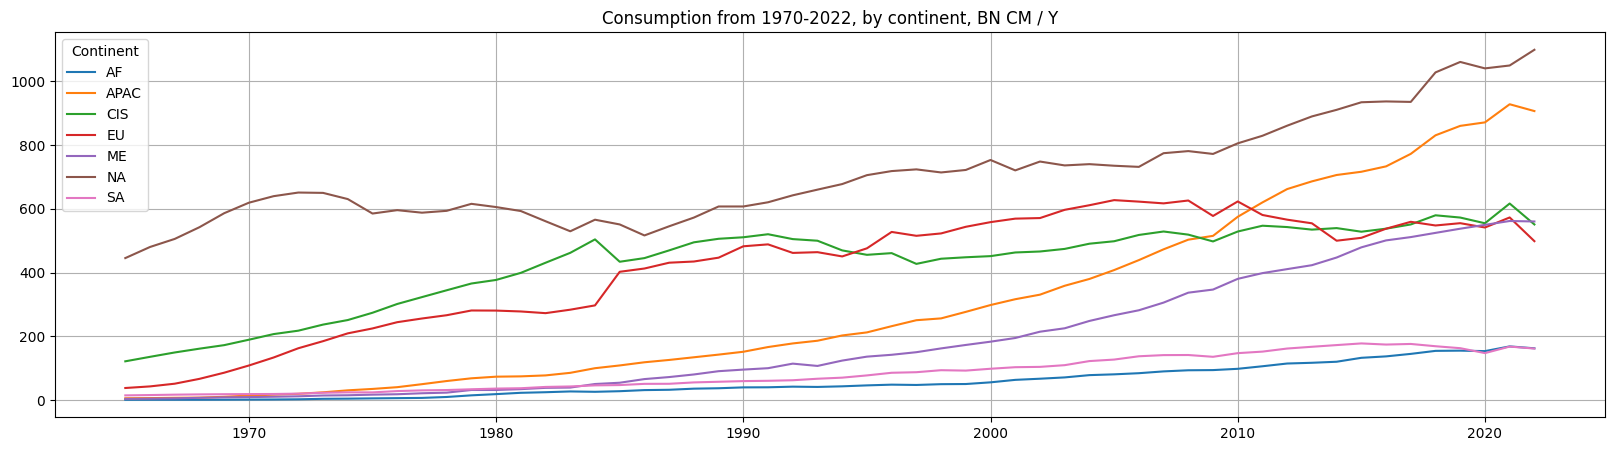

In [170]:
gas_consumption.T.groupby(level=0,axis=1).sum().plot(figsize=(20,5),grid=True, title='Consumption from 1970-2022, by continent, BN CM / Y')

<AxesSubplot: title={'center': 'Gas consumption 2022 top 15, BN CM / Y'}, ylabel='Continent,Country'>

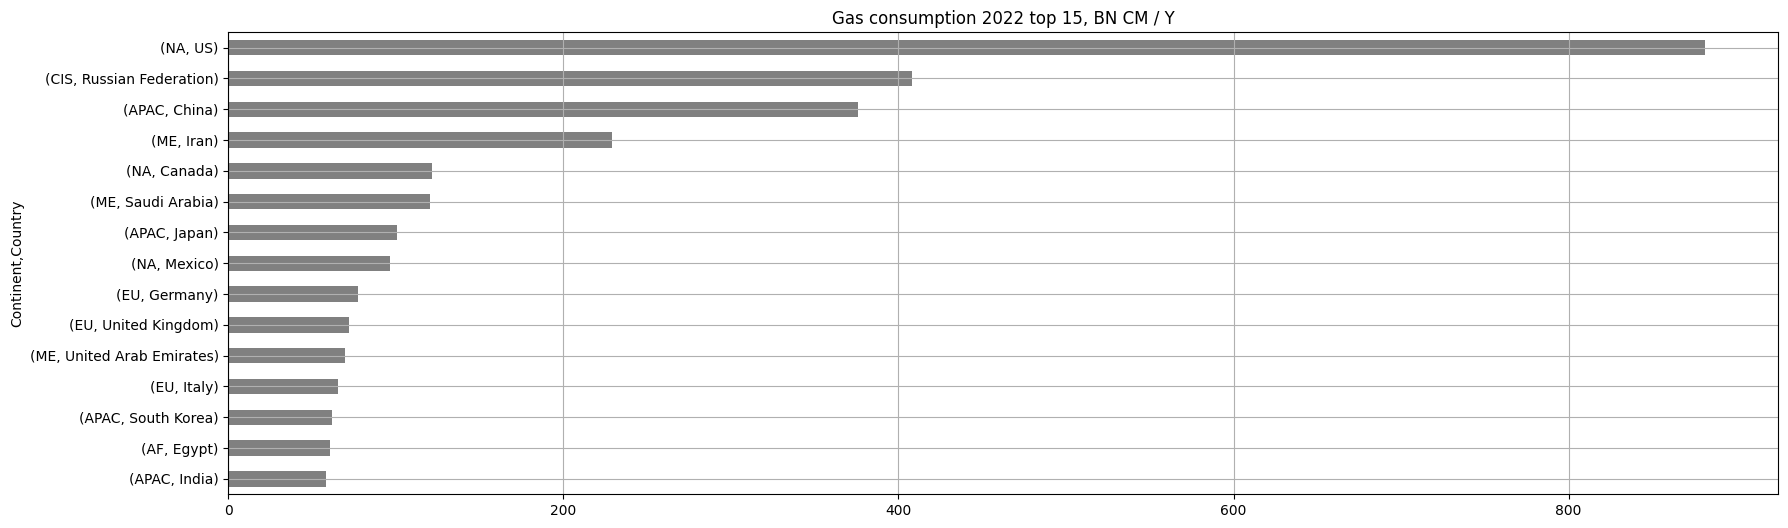

In [171]:
gas_consumption.T.iloc[-1].sort_values().iloc[-15:].dropna().plot(figsize=(20,6),grid=True, kind='barh', color='grey', title='Gas consumption 2022 top 15, BN CM / Y')

# Gas Prices

<AxesSubplot: xlabel='Year'>

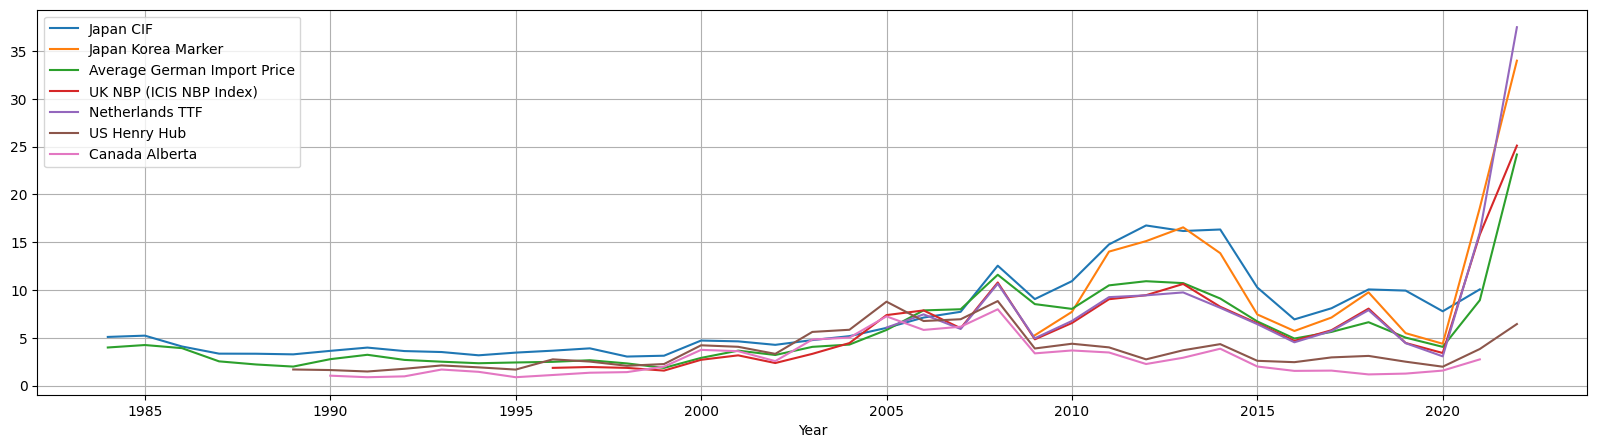

In [172]:
import numpy as np
gas_prices.replace('-',np.NaN).plot(figsize=(20,5),grid=True,)

# Gas LNG Movement 2022

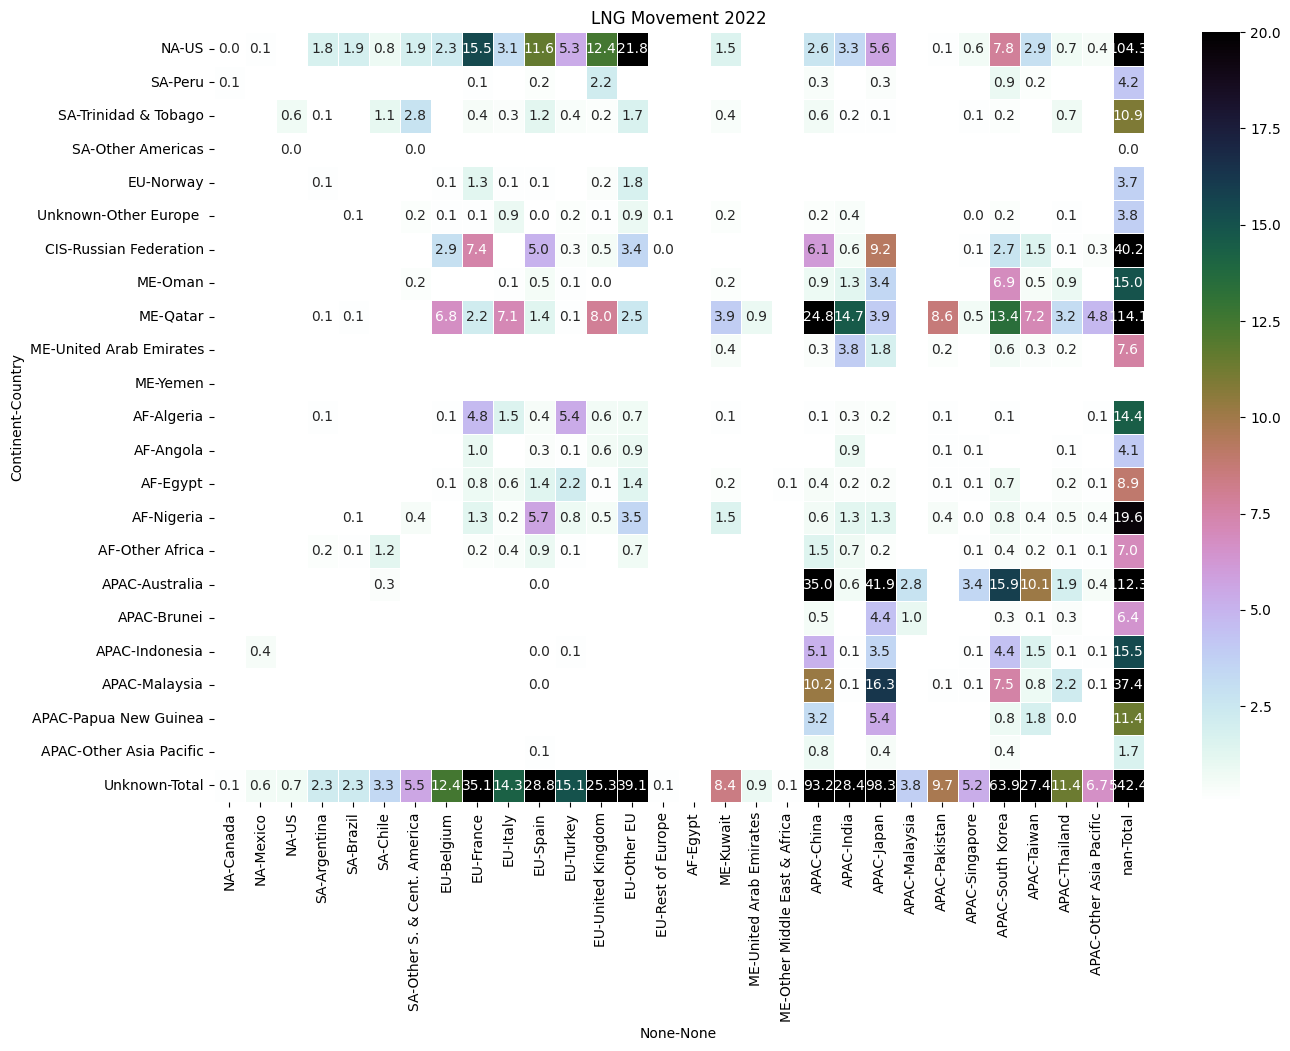

In [173]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
g = sns.heatmap(
    lng_trade_movements,
    annot=True, cmap='cubehelix_r', fmt='.1f', linewidths=.5,vmax=20)

# g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 8)

# Set the title
plt.title('LNG Movement 2022')

# Show the plot
plt.show()

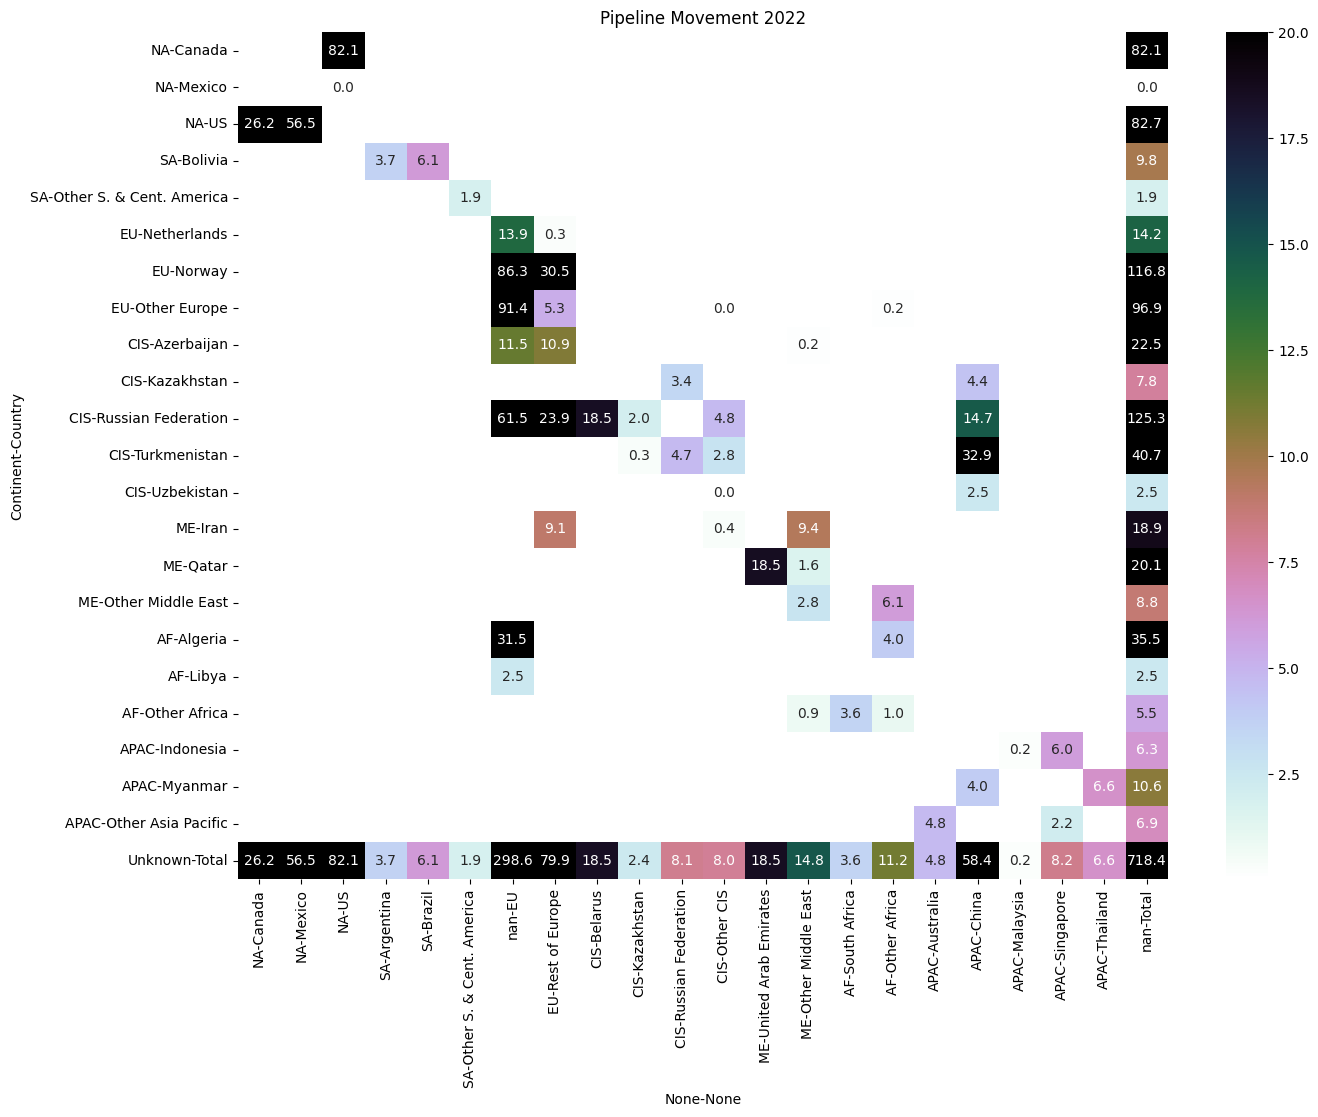

In [177]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,11))
g = sns.heatmap(
    pipeline_trade_movements,
    annot=True, cmap='cubehelix_r', fmt='.1f', linewidths=0,vmax=20)

g.set_xticklabels(g.get_xticklabels(), rotation = 90)

# Set the title
plt.title('Pipeline Movement 2022')

# Show the plot
plt.show()